In [449]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [252]:
df=pd.read_csv("C:\\Users\\srivi\\Downloads\\cubic_zirconia.csv")

In [253]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [254]:
df.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
0               1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29   
1               2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46   
2               3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12   
3               4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80   
4               5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43   
...           ...    ...        ...   ...     ...    ...    ...   ...   ...   
26962       26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52   
26963       26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42   
26964       26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15   
26965       26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20   
26966       26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88   

          z  price 

In [255]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [256]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [354]:
df.shape

(26967, 11)

In [355]:
df1=df.drop("Unnamed: 0",axis=1)

In [356]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [357]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [358]:
df1.shape

(26967, 10)

In [359]:
df1.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [360]:
print("Number of rows with x == 0: {} ".format((df1.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df1.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df1.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df1.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [361]:
df1 = df1.drop(df1[df1["x"]==0].index)
df1 = df1.drop(df1[df1["y"]==0].index)
df1 = df1.drop(df1[df1["z"]==0].index)
df1.shape

(26958, 10)

In [362]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df1.shape)

Number of duplicate rows = 33
(26958, 10)


In [363]:
df1.drop_duplicates()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [353]:
df1.shape

(26958, 10)

In [346]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


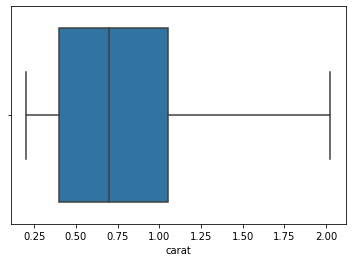

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


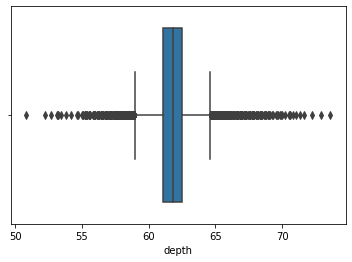

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


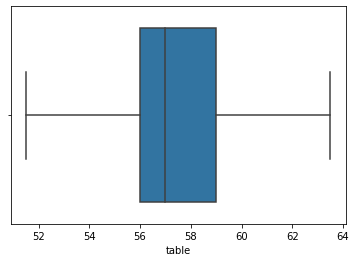

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


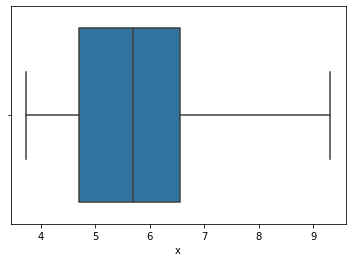

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


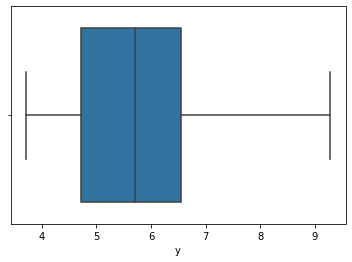

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


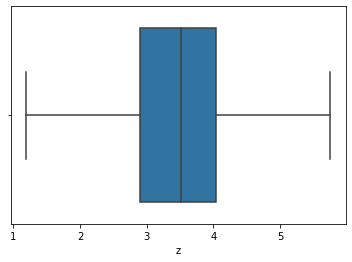

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


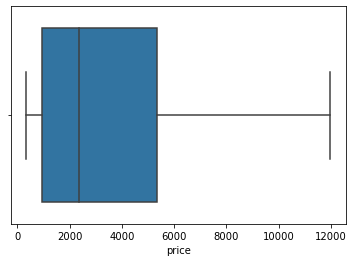

In [347]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

In [269]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [270]:
for column in df1[cols].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


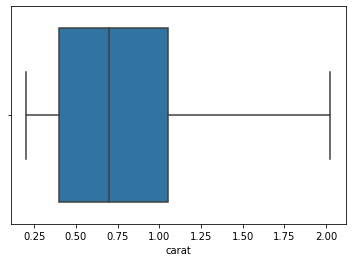

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


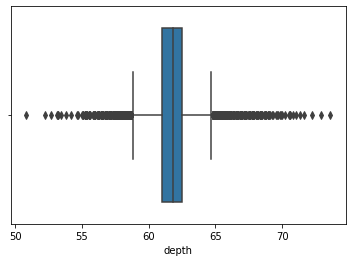

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


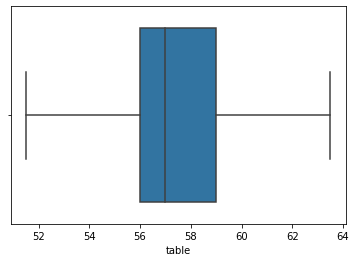

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


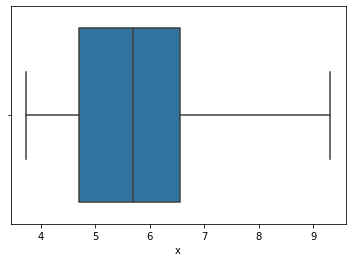

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


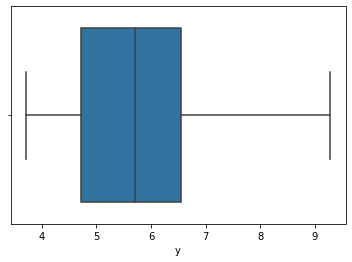

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


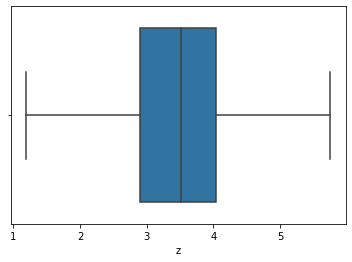

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


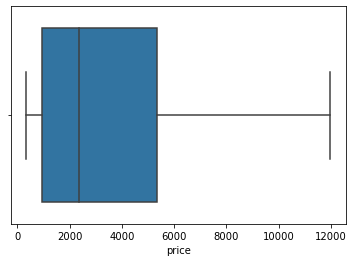

In [271]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

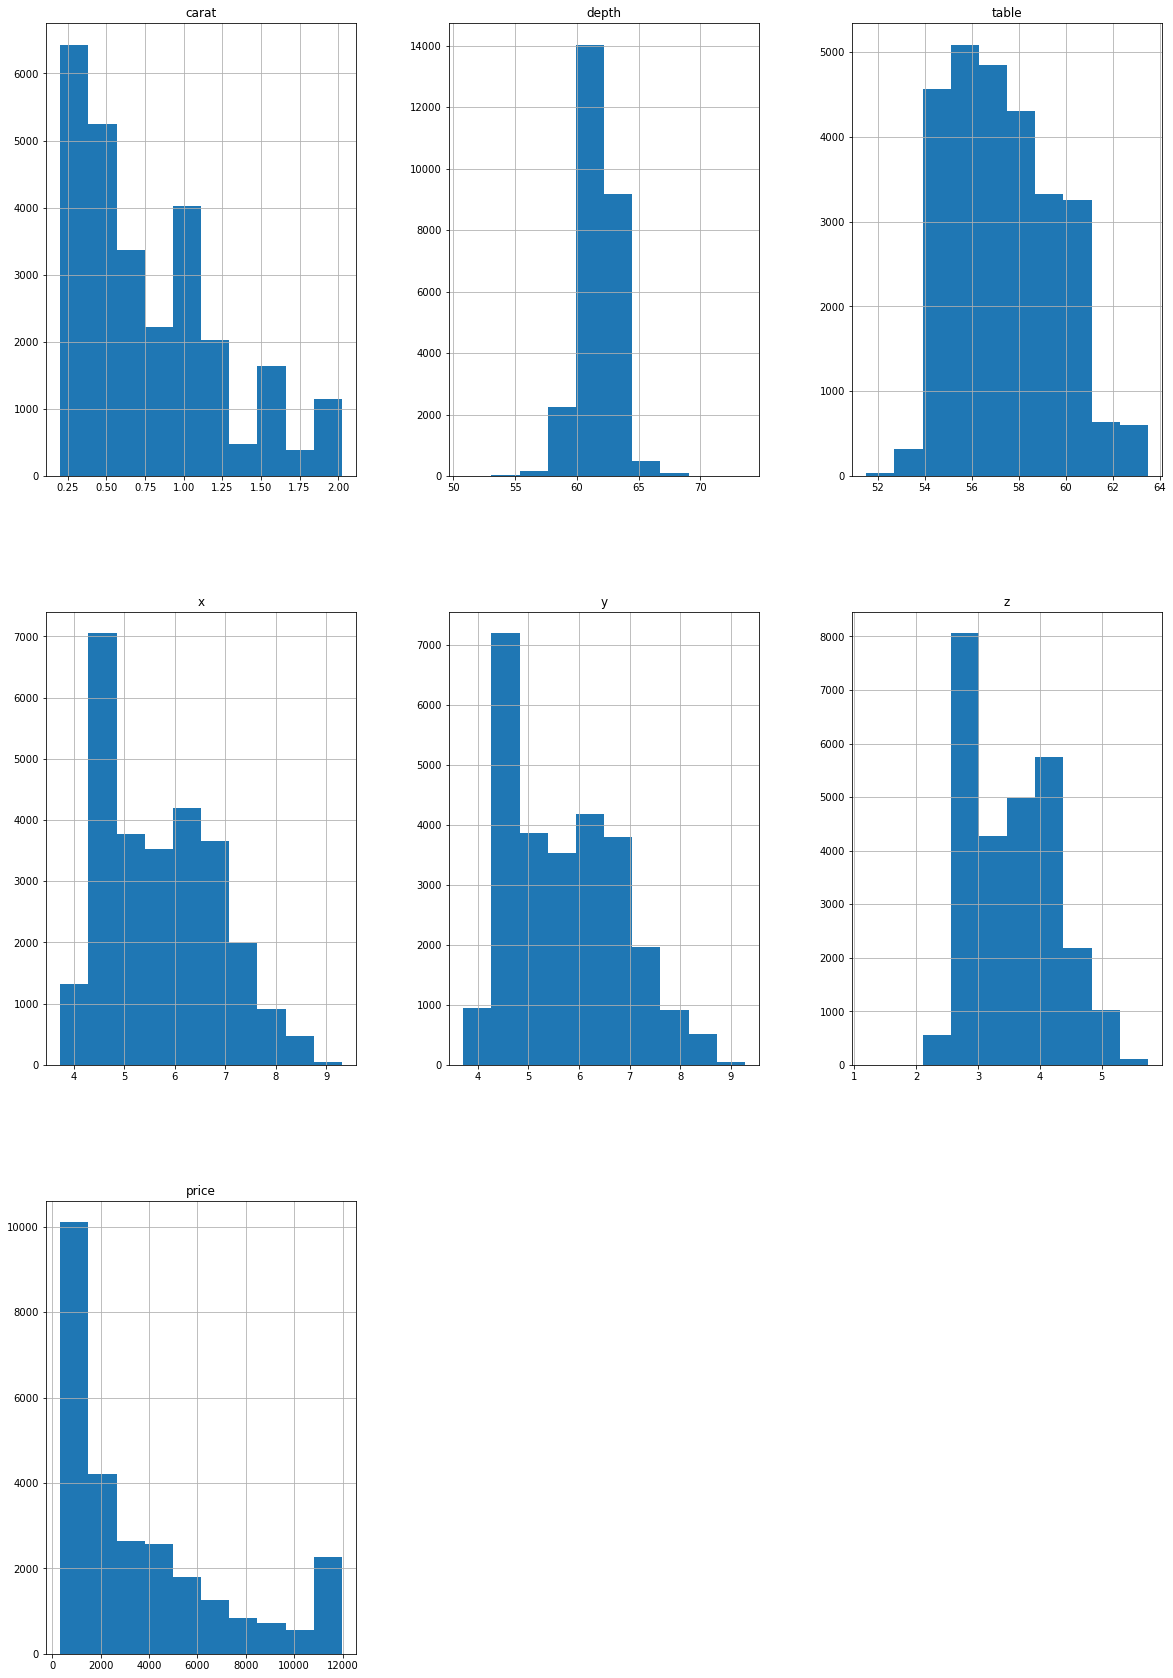

In [272]:
df1.hist(figsize=(20,30));

In [273]:
df1.skew()

carat    0.917116
depth   -0.027571
table    0.480895
x        0.398233
y        0.394542
z        0.395750
price    1.157774
dtype: float64

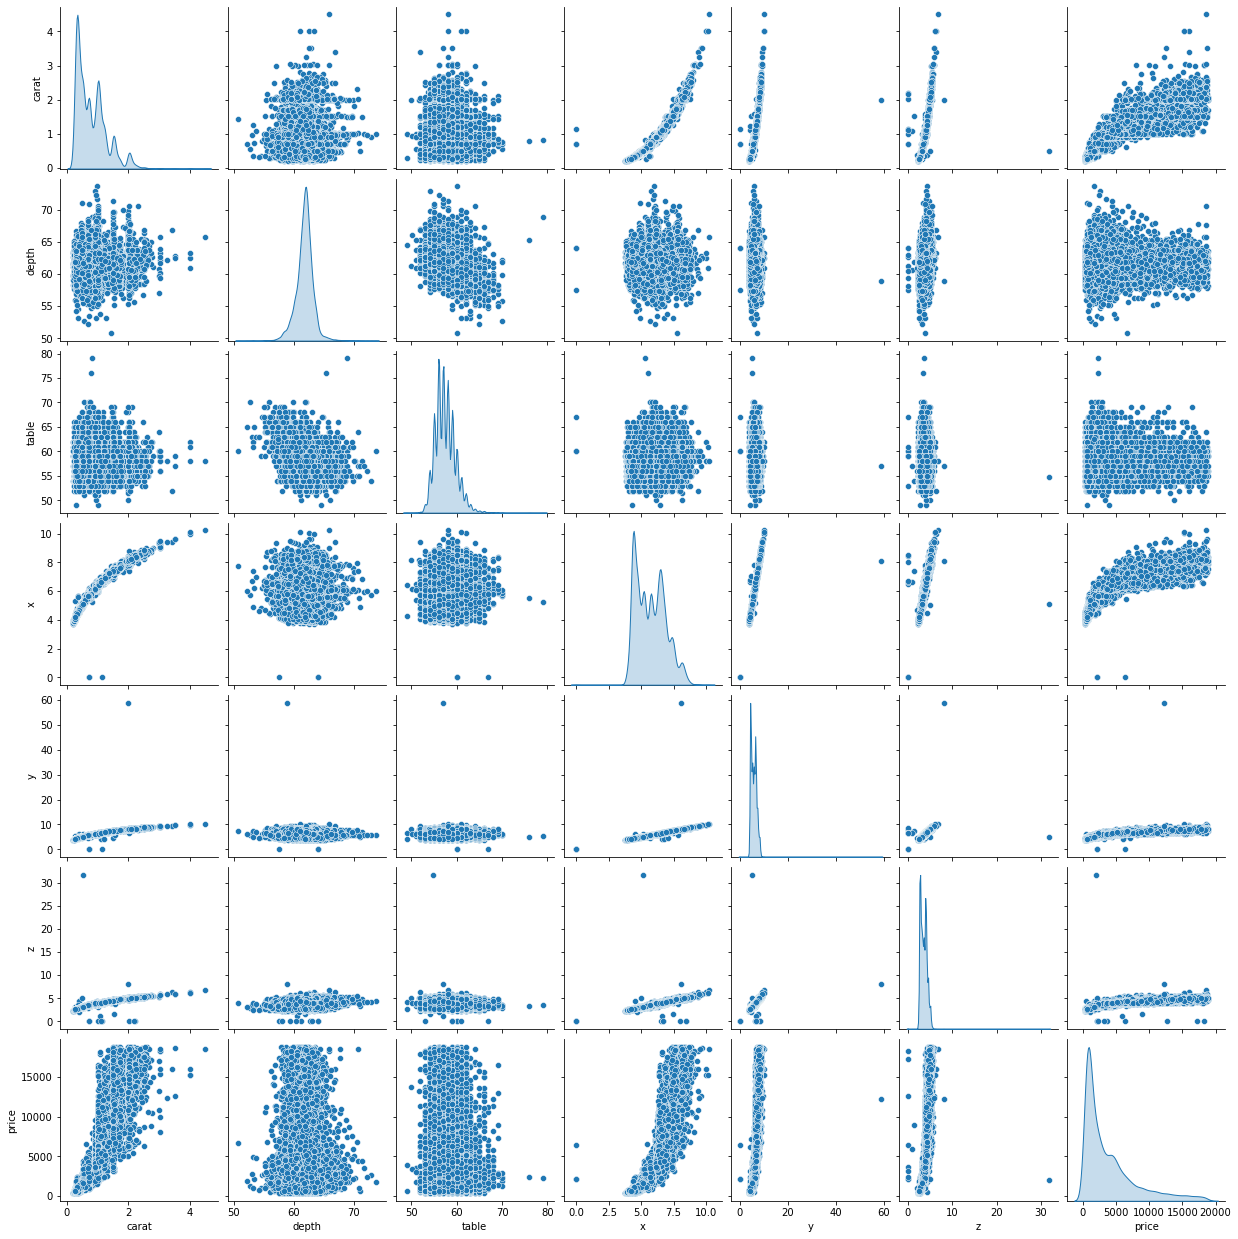

In [274]:
df1_attr = (df[cols])
sns.pairplot(df1_attr, diag_kind='kde')  
plt.show()

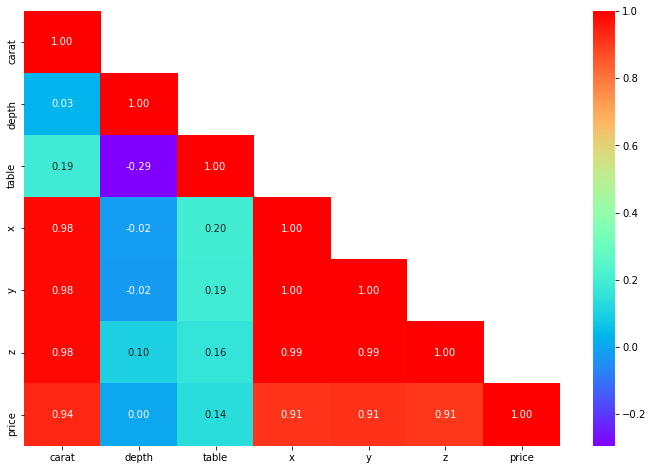

In [275]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df1.corr(),+1))
plt.show()

In [276]:
correlations = df1.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936743
y        0.914793
x        0.913356
z        0.908588
table    0.138027
depth    0.000585
Name: price, dtype: float64

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


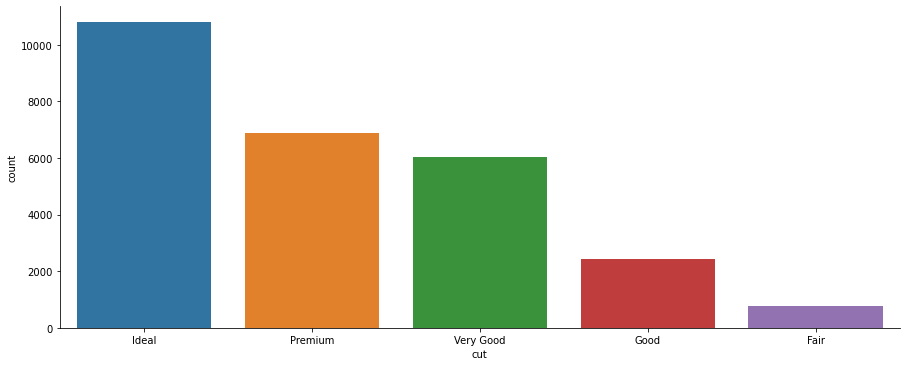

In [277]:
sns.catplot('cut', data=df1, kind='count',aspect=2.5)

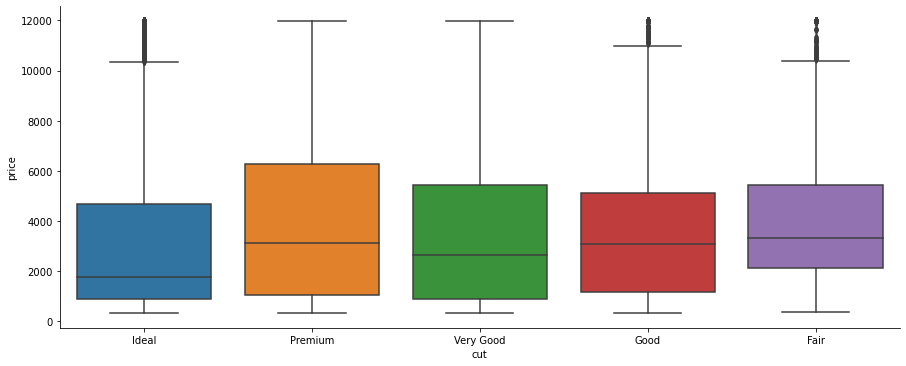

In [278]:
sns.catplot(x='cut', y='price', kind='box', data=df1, aspect=2.5)

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


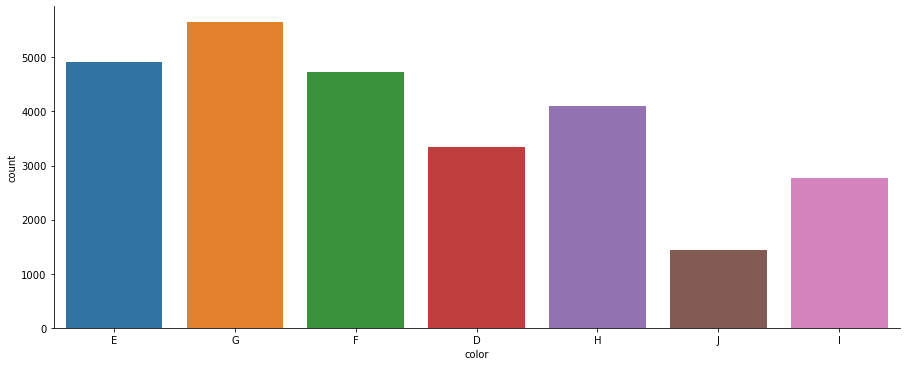

In [279]:
sns.catplot('color', kind='count', data=df1, aspect=2.5)

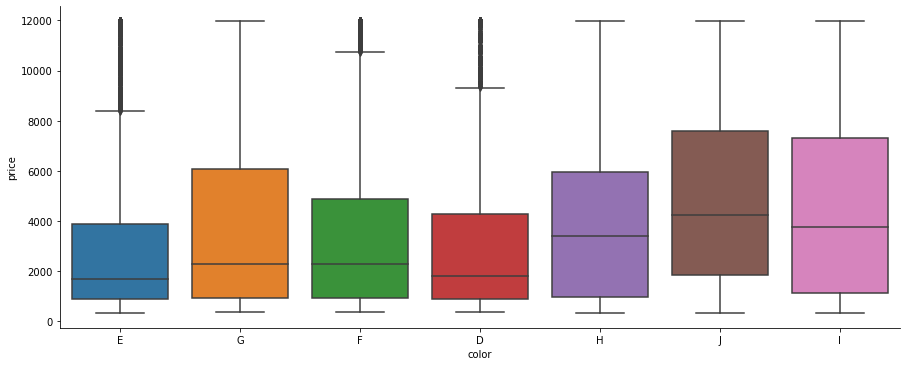

In [280]:
sns.catplot(x='color', y='price', data=df1, aspect =2.5, kind='box')

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


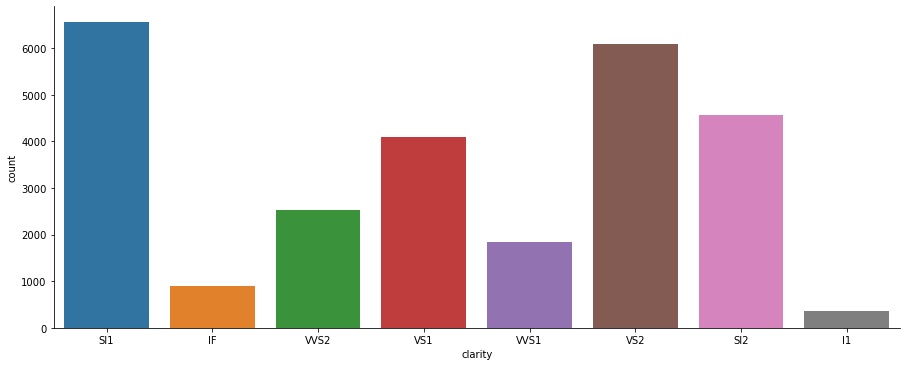

In [281]:
sns.catplot('clarity', data=df1, kind='count',aspect=2.5)

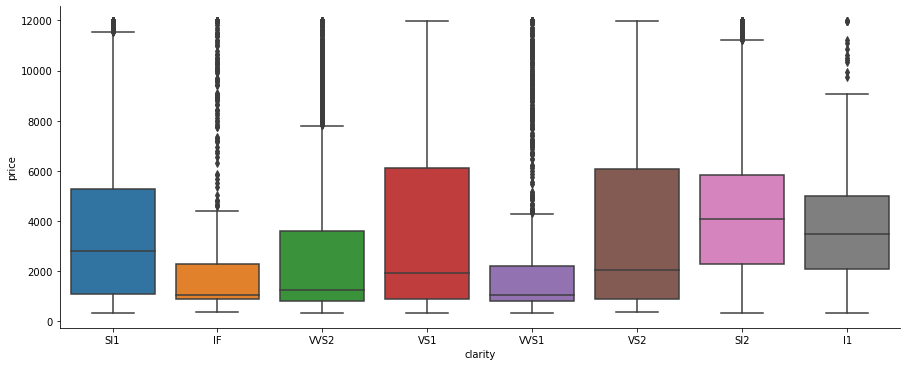

In [282]:
sns.catplot(x='clarity', y='price', data=df1, aspect =2.5, kind='box')

In [283]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [284]:
df1.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [285]:
df1=df1.fillna(df1.median())

In [286]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [287]:
df1.shape

(26958, 10)

In [288]:
print('cut\n',df1.cut.value_counts())
print('\n')
print('color\n',df1.color.value_counts())
print('\n')
print('clarity\n',df1.clarity.value_counts())
print('\n')

cut
 Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64


color
 G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
 SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64




In [289]:
df1['cut']=np.where(df1['cut'] =='Ideal', '4', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Premium', '3', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Very Good', '2',df1['cut'])
df1['cut']=np.where(df1['cut'] =='Good', '1', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Fair', '0', df1['cut'])

In [290]:
df1['color']=np.where(df1['color'] =='D', '6', df1['color'])
df1['color']=np.where(df1['color'] =='E', '5', df1['color'])
df1['color']=np.where(df1['color'] =='F', '4', df1['color'])
df1['color']=np.where(df1['color'] =='G', '3', df1['color'])
df1['color']=np.where(df1['color'] =='H', '2', df1['color'])
df1['color']=np.where(df1['color'] =='I', '1', df1['color'])
df1['color']=np.where(df1['color'] =='J', '0', df1['color'])

In [291]:
df1['clarity']=np.where(df1['clarity'] =='IF', '7', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS1', '6', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS2', '5', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS1', '4', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS2', '3', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI1', '2', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI2', '1', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='I1', '0', df1['clarity'])

In [292]:
df1.dtypes 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [175]:
df1['cut'] = df1['cut'].astype('float64')
df1['color'] = df1['color'].astype('float64')
df1['clarity'] = df1['clarity'].astype('float64')

In [76]:
df1.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [180]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,1.0,2.0,2.0,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706


In [234]:
X = df1.drop('price', axis=1)
y = df1[['price']]

In [237]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [366]:
from sklearn.model_selection import train_test_split

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [368]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [369]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 10971.959469103334
The coefficient for cut is 112.0165576216898
The coefficient for color is 321.7589237071654
The coefficient for clarity is 493.64060995217847
The coefficient for depth is -89.08929193644471
The coefficient for table is -30.461968984839842
The coefficient for x is -932.8382282679624
The coefficient for y is 9.534630894492523
The coefficient for z is -50.703234871119776


In [297]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4977.749897170415


In [298]:
regression_model.score(X_train, y_train)

0.9105972285875985

In [299]:
regression_model.score(X_test, y_test)

0.9034947187279738

In [300]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1191.8270053863512

In [301]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1276.3108282639637

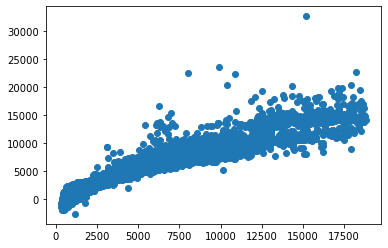

In [302]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [306]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,2.0,3.0,4.0,63.3,59.0,5.52,5.61,3.52,2768
8882,0.30,2.0,5.0,3.0,62.9,58.0,4.27,4.31,2.70,544
22763,0.70,1.0,2.0,3.0,63.9,59.0,5.64,5.60,3.59,2351
6643,0.36,4.0,5.0,3.0,60.2,56.0,4.65,4.62,2.79,1080
18701,1.66,2.0,1.0,2.0,63.0,57.0,7.45,7.50,4.71,8901


In [307]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept      3229.806890
cut[T.1.0]      745.948627
cut[T.2.0]      908.603981
cut[T.3.0]      937.268644
cut[T.4.0]     1006.191915
carat         10952.120109
color           321.289208
clarity         493.922992
depth           -72.310638
table           -29.221858
x              -906.971835
y                 0.363100
z               -58.483062
dtype: float64

In [308]:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:59:56   Log-Likelihood:            -1.6036e+05
No. Observations:               18870   AIC:                         3.207e+05
Df Residuals:                   18857   BIC:                         3.208e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3229.8069    723.440      4.465      0.0

In [311]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [310]:
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [312]:
np.sqrt(mse)

1186.819583724412

In [313]:
np.sqrt(mse1)

1269.7387756148669

In [314]:
y_pred = lm1.predict(data_test)

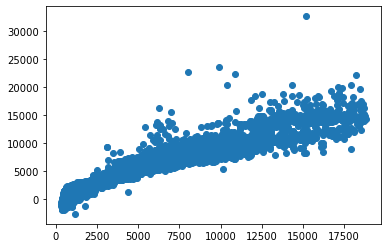

In [315]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [316]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3229.81) * Intercept + (745.95) * cut[T.1.0] + (908.6) * cut[T.2.0] + (937.27) * cut[T.3.0] + (1006.19) * cut[T.4.0] + (10952.12) * carat + (321.29) * color + (493.92) * clarity + (-72.31) * depth + (-29.22) * table + (-906.97) * x + (0.36) * y + (-58.48) * z + 

In [317]:
df2=pd.read_csv("C:\\Users\\srivi\\Downloads\\Holiday_Package.csv")

In [318]:
df2.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [319]:
df2.info

<bound method DataFrame.info of      Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0             1               no   48412   30     8                  1   
1             2              yes   37207   45     8                  0   
2             3               no   58022   46     9                  0   
3             4               no   66503   31    11                  2   
4             5               no   66734   44    12                  0   
..          ...              ...     ...  ...   ...                ...   
867         868               no   40030   24     4                  2   
868         869              yes   32137   48     8                  0   
869         870               no   25178   24     6                  2   
870         871              yes   55958   41    10                  0   
871         872               no   74659   51    10                  0   

     no_older_children foreign  
0                    1      no  
1            

In [321]:
df2.shape

(872, 8)

In [322]:
df2.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [323]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [325]:
df2.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [374]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [381]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [382]:
df2.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Text(0.5, 1.0, 'no_older_children Distribution')

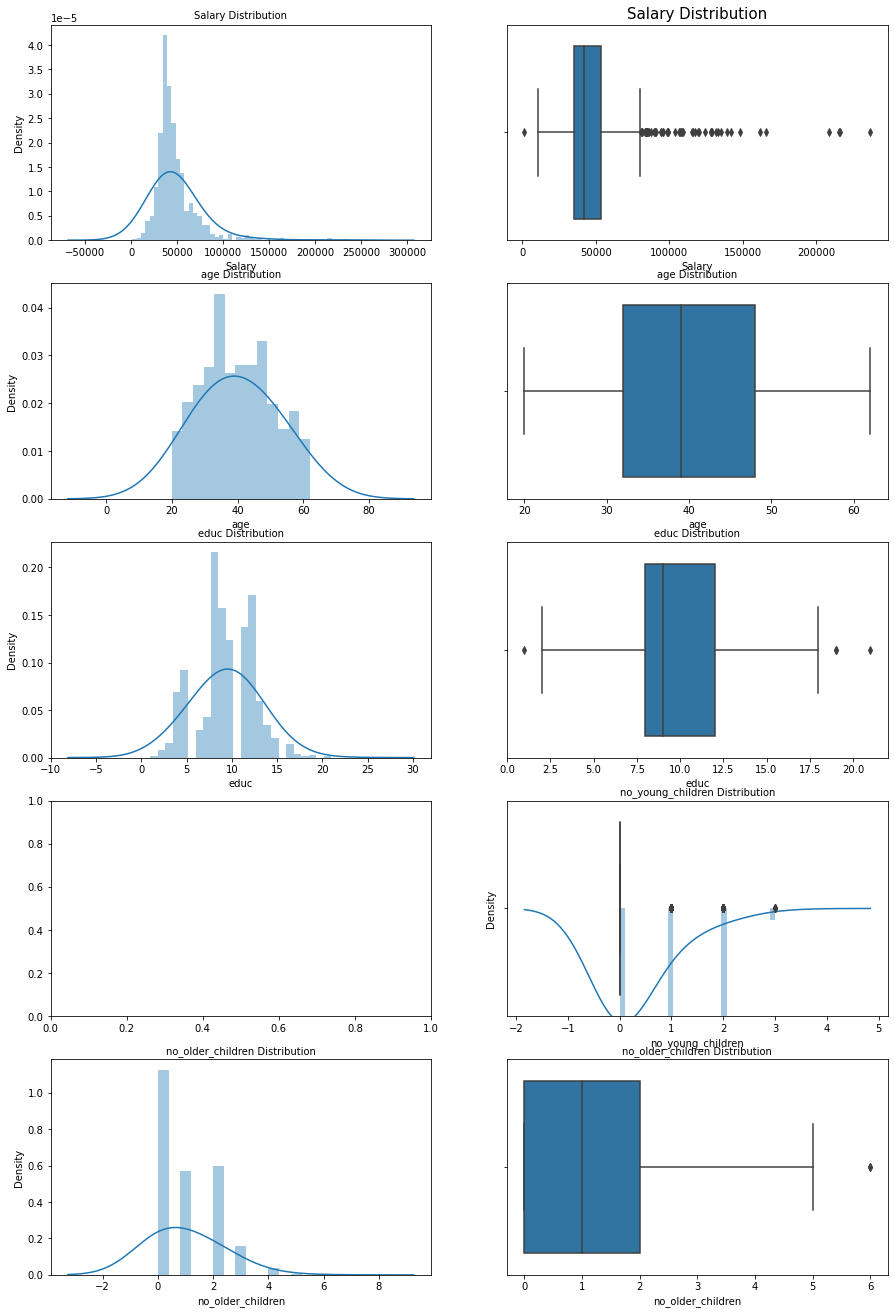

In [388]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 23)

a = sns.distplot(df2['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)
a = sns.boxplot(df2['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)
a = sns.distplot(df2['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(df2['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)
a = sns.distplot(df2['educ'], kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)
a = sns.boxplot(df2['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)
a = sns.distplot(df2['no_young_children'], kde_kws = {'bw' : 1}, ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)  
a = sns.boxplot(df2['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)
a = sns.distplot(df2['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)
a = sns.boxplot(df2['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

In [390]:
df2.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [391]:
df2.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

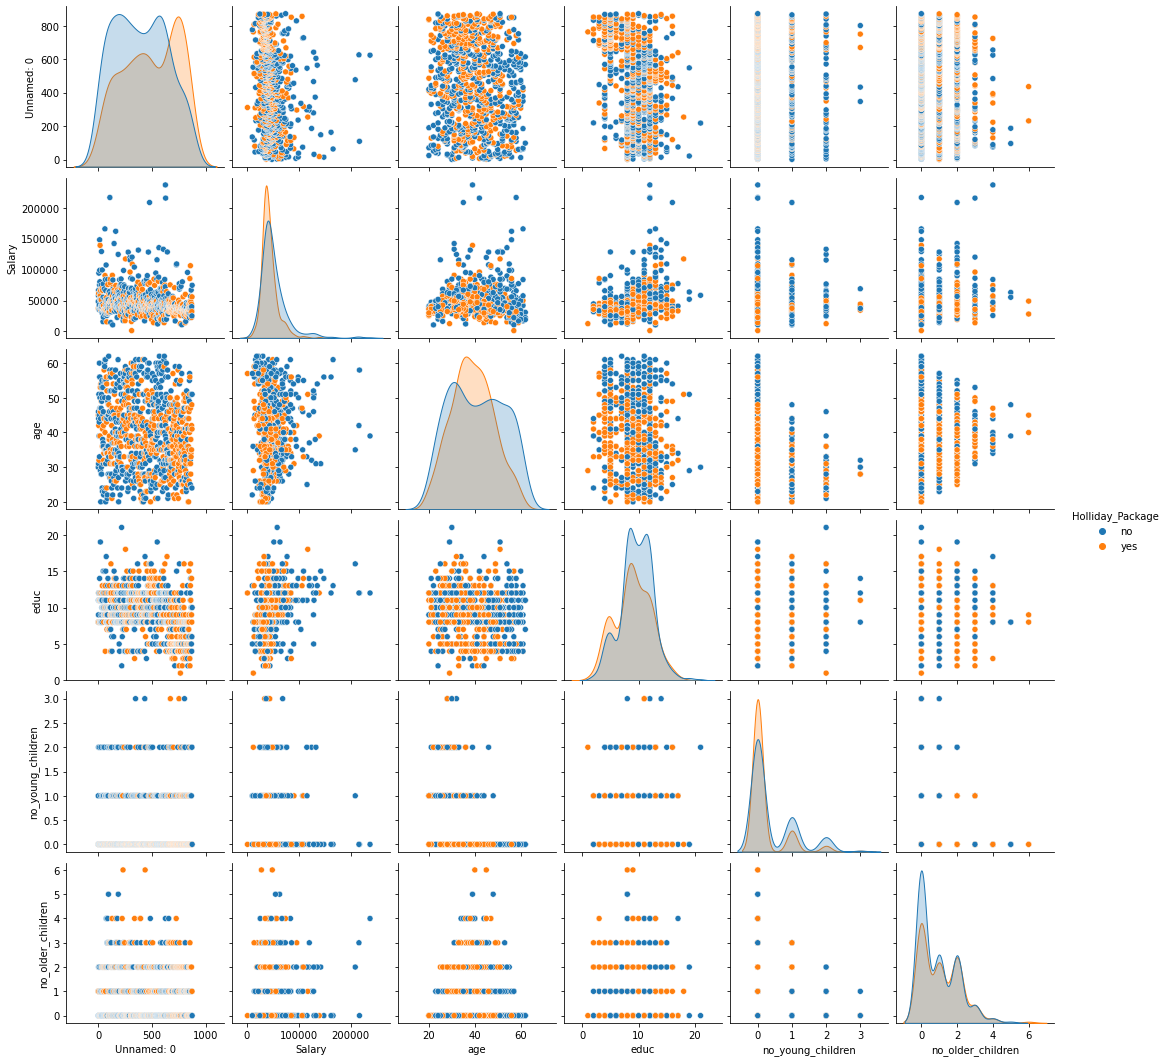

In [393]:
sns.pairplot(df2 ,diag_kind='kde' ,hue='Holliday_Package');

<AxesSubplot:>

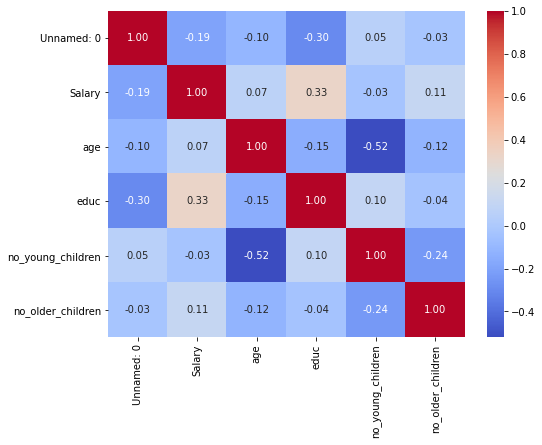

In [395]:
df_cor = df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

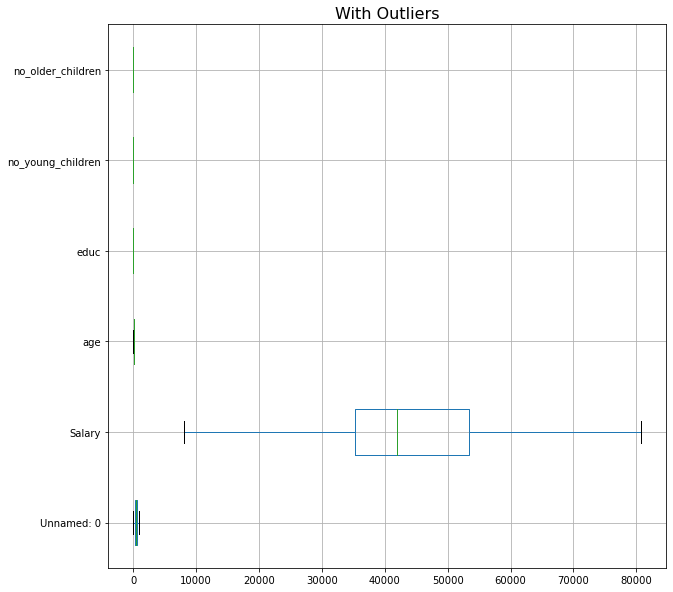

In [413]:
cont=df2.dtypes[(df2.dtypes!='uint8') & (df2.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df2[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [396]:
def remove_outlier(col):
 sorted(col)
 Q1,Q3=np.percentile(col,[25,75])
 IQR=Q3-Q1
 lower_range= Q1-(1.5 * IQR)
 upper_range= Q3+(1.5 * IQR)
 return lower_range, upper_range

In [403]:
for column in df2[col].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])

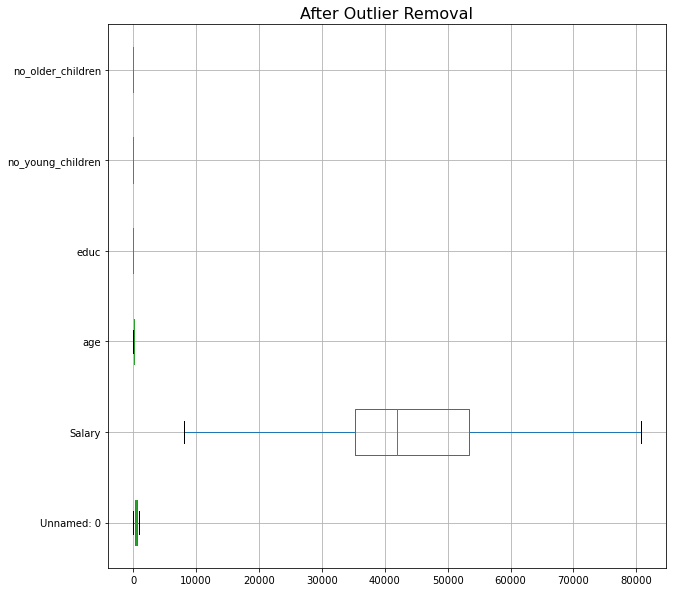

In [415]:
plt.figure(figsize=(10,10))
df2[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [404]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412.0,30.0,8.0,0.0,1.0,no
1,2,yes,37207.0,45.0,8.0,0.0,1.0,no
2,3,no,58022.0,46.0,9.0,0.0,0.0,no
3,4,no,66503.0,31.0,11.0,0.0,0.0,no
4,5,no,66734.0,44.0,12.0,0.0,2.0,no


In [405]:
holiday1 = df2.drop(columns=['Unnamed: 0'], axis=1)

In [406]:
holiday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [408]:
holiday2 = holiday1.copy()

In [409]:
h1 = pd.get_dummies(holiday2, columns=['Holliday_Package','foreign'], drop_first=True)

In [410]:
h1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [411]:
h1.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

In [412]:
X = h1.drop('Holliday_Package_yes', axis=1)
y = h1['Holliday_Package_yes']

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [418]:
y_train.value_counts(1)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [424]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [426]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [427]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


In [428]:
model.score(X_train, y_train)

0.6409836065573771

AUC: 0.667


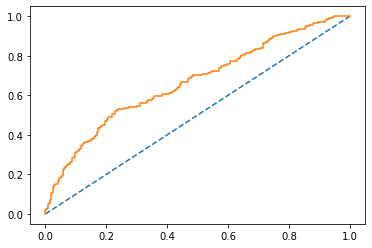

In [429]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [430]:
model.score(X_test, y_test)

0.6297709923664122

AUC: 0.667


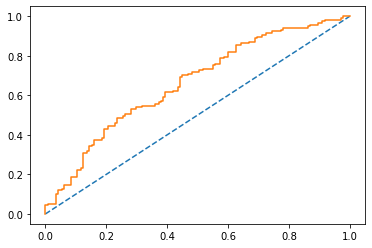

In [431]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [432]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

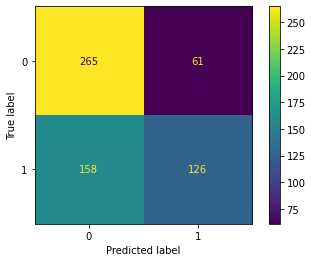

In [433]:
plot_confusion_matrix(model,X_train,y_train);

In [434]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [435]:
confusion_matrix(y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

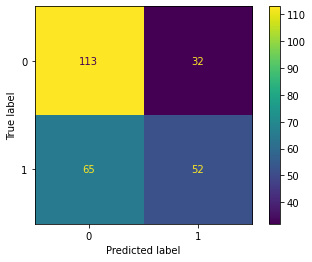

In [436]:
plot_confusion_matrix(model,X_test,y_test);

In [437]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [438]:
# View the Intercept and Coefficents:::

print(model.coef_ )#Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(model.intercept_)  #Prints value for intercept/b0 
print(pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_.tolist()[0])), columns=['features', 'coef']))


odds = np.exp(model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

#

[[-1.85343157e-05 -8.97529371e-03  6.63946756e-02  0.00000000e+00
   1.86667580e-01  1.33177839e+00]]
[-0.05269843]
            features      coef
0             Salary -0.000019
1                age -0.008975
2               educ  0.066395
3  no_young_children  0.000000
4  no_older_children  0.186668
5        foreign_yes  1.331778


,coef
foreign_yes,3.787774
no_older_children,1.205227
educ,1.068648
no_young_children,1.000000
Salary,0.999981
age,0.991065


In [439]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [440]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [441]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [442]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [443]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [444]:
best_model = grid_search.best_estimator_

In [445]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [446]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.591059,0.408941
1,0.540422,0.459578
2,0.548785,0.451215
3,0.598271,0.401729
4,0.530047,0.469953


              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



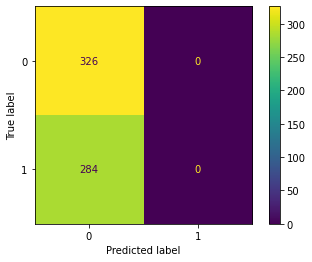

In [447]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



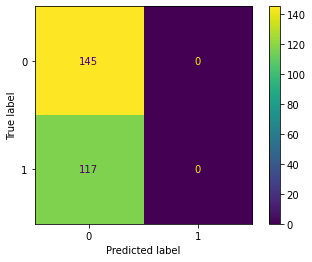

In [448]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [452]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [453]:
pred_class_train = model.predict(X_train)
pred_class_train
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

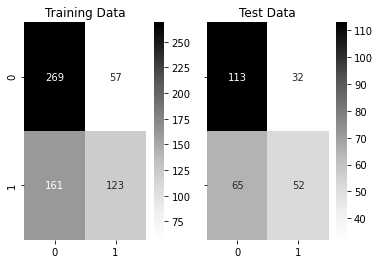

In [454]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [455]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [456]:
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [457]:
pred_prob_train

array([[0.70767264, 0.29232736],
       [0.28781484, 0.71218516],
       [0.74058906, 0.25941094],
       ...,
       [0.68441107, 0.31558893],
       [0.75673248, 0.24326752],
       [0.78468598, 0.21531402]])

AUC for the Training Data: 0.667
AUC for the Test Data: 0.662


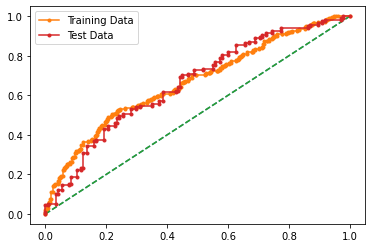

In [459]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4656
F1 Score 0.6353 

Confusion Matrix


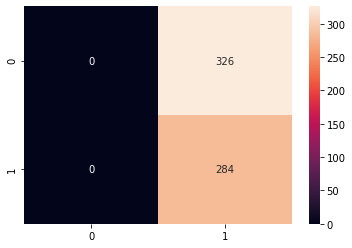

0.2 

Accuracy Score 0.4721
F1 Score 0.6382 

Confusion Matrix


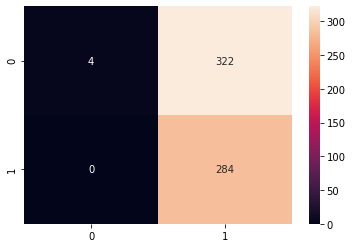

0.3 

Accuracy Score 0.523
F1 Score 0.6447 

Confusion Matrix


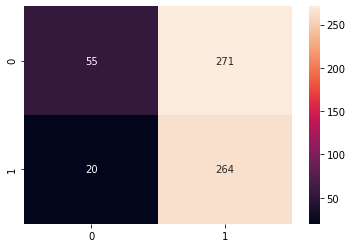

0.4 

Accuracy Score 0.5967
F1 Score 0.618 

Confusion Matrix


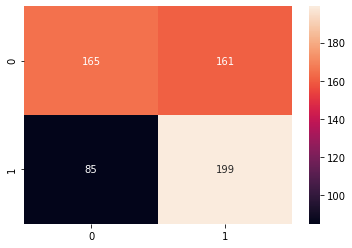

0.5 

Accuracy Score 0.6426
F1 Score 0.5302 

Confusion Matrix


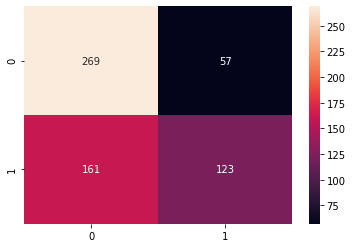

0.6 

Accuracy Score 0.6328
F1 Score 0.4717 

Confusion Matrix


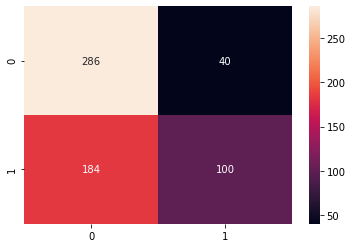

0.7 

Accuracy Score 0.6082
F1 Score 0.3558 

Confusion Matrix


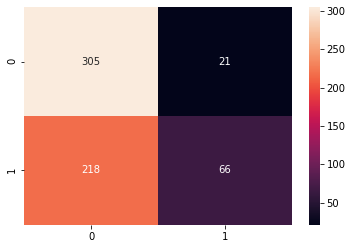

0.8 

Accuracy Score 0.5377
F1 Score 0.014 

Confusion Matrix


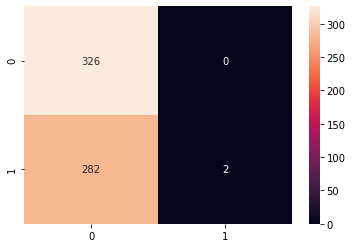

0.9 

Accuracy Score 0.5344
F1 Score 0.0 

Confusion Matrix


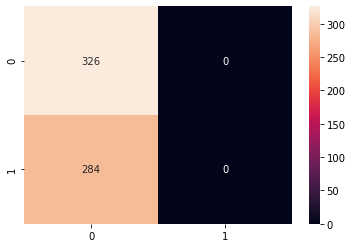

In [460]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [461]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

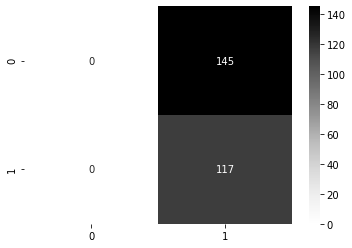

In [462]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [463]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.45      1.00      0.62       117

    accuracy                           0.45       262
   macro avg       0.22      0.50      0.31       262
weighted avg       0.20      0.45      0.28       262
 

